# DSN-AI-Bootcamp-Qualification-Hackathon

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing train and test datasets
data_test = pd.read_csv("C:/Users/IKECHUKWU/Desktop/ML Datasets/DSN Hackathon/Housing_dataset_test.csv")
data_train = pd.read_csv("C:/Users/IKECHUKWU/Desktop/ML Datasets/DSN Hackathon/Housing_dataset_train.csv")
train = data_train.copy()
test = data_test.copy()
ID = data_test.ID

In [3]:
# Removing ID column
def drop_id(xp):
    xp = xp.drop("ID", axis = 1)
    return xp
train = drop_id(train)
test = drop_id(test)

In [4]:
train.isna().sum()

loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

## Encoding categorical variables

In [5]:
data = pd.concat([train,test], axis = 0)
data = data.drop(["price"], axis=1)
data.shape, train.shape, test.shape

((20000, 5), (14000, 6), (6000, 5))

In [6]:
# Encoding "title" column
data["title"] = data["title"].astype("category")
title_unique = {'Cottage': 1,
                'Bungalow': 2,
                'Townhouse': 3,
                'Terrace duplex': 4,
                'Detached duplex': 5,
                'Semi-detached duplex': 6,
                'Flat': 7,
                'Penthouse': 8,
                'Apartment': 9,
                'Mansion': 10
               }
data["title"] = data["title"].map(title_unique)
data

,loc,title,bedroom,bathroom,parking_space
0,Katsina,6,2.0,2.0,1.0
1,Ondo,9,NaN,2.0,4.0
2,Ekiti,NaN,7.0,5.0,NaN
3,Anambra,5,5.0,2.0,4.0
4,Kogi,4,NaN,5.0,6.0
...,...,...,...,...,...
5995,Ekiti,7,4.0,5.0,2.0
5996,Adamawa,4,5.0,7.0,1.0
5997,Oyo,3,4.0,1.0,4.0
5998,Bauchi,7,3.0,7.0,5.0


## Feature Engineering

In [7]:
# Creating "regions" feature 
def get_region(state):
    if state in ['Adamawa', 'Kogi', 'Kwara', 'Katsina', 'Nasarawa', 'Bauchi', 'Niger', 'Kano', 'Gombe', 'Taraba', 'Yobe', 'Zamfara', 'Borno', 'Jigawa', 'Plateau', 'Kaduna', 'Sokoto', 'Kebbi']:
        return 'North'
    elif state in ['Anambra', 'Abia', 'Imo', 'Enugu', 'Ebonyi']:
        return 'East'
    elif state in ['Lagos', 'Ondo', 'Osun', 'Ekiti', 'Oyo', 'Ogun']:
        return 'West'
    elif state in ['Edo', 'Benue', 'Delta', 'Cross River', 'Akwa Ibom', 'Bayelsa', 'Rivers']:
        return 'South'
    else:
        return None

data["regions"] = data["loc"].apply(get_region)
data

,loc,title,bedroom,bathroom,parking_space,regions
0,Katsina,6,2.0,2.0,1.0,North
1,Ondo,9,NaN,2.0,4.0,West
2,Ekiti,NaN,7.0,5.0,NaN,West
3,Anambra,5,5.0,2.0,4.0,East
4,Kogi,4,NaN,5.0,6.0,North
...,...,...,...,...,...,...
5995,Ekiti,7,4.0,5.0,2.0,West
5996,Adamawa,4,5.0,7.0,1.0,North
5997,Oyo,3,4.0,1.0,4.0,West
5998,Bauchi,7,3.0,7.0,5.0,North


In [8]:
from sklearn.preprocessing import LabelEncoder, minmax_scale
encoder = LabelEncoder()
# Encoding "loc" column
data["loc"]=encoder.fit_transform(data["loc"])
data["loc"] = minmax_scale(data["loc"])
# Creating a new feature 
data["bathroom-bedroom ratio"] = data["bathroom"]/data["bedroom"]
# Encoding "Region" column
data["regions"] = encoder.fit_transform(data["regions"])
data["regions"] = minmax_scale(data["regions"])
# Redefining feature and target variables after encoding                                            
feature = data[:train.shape[0]]
target = train.price
ft_test = data[train.shape[0]:]

In [9]:
data

,loc,title,bedroom,bathroom,parking_space,regions,bathroom-bedroom ratio
0,0.527778,6,2.0,2.0,1.0,0.25,1.000000
1,0.750000,9,NaN,2.0,4.0,0.75,NaN
2,0.333333,NaN,7.0,5.0,NaN,0.75,0.714286
3,0.083333,5,5.0,2.0,4.0,0.00,0.400000
4,0.583333,4,NaN,5.0,6.0,0.25,NaN
...,...,...,...,...,...,...,...
5995,0.333333,7,4.0,5.0,2.0,0.75,1.250000
5996,0.027778,4,5.0,7.0,1.0,0.25,1.400000
5997,0.805556,3,4.0,1.0,4.0,0.75,0.250000
5998,0.111111,7,3.0,7.0,5.0,0.25,2.333333


## Model Training and Evaluation

In [10]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, target, random_state=42, test_size=0.2)
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train, y_train)
test_predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,test_predictions, squared=False )
print(f"RMSE Value: {mse}\nThe test data was splitted inorder to calculate the accuracy of the model using Root Mean Squared Error. ")

RMSE Value: 578183.4697566264
The test data was splitted inorder to calculate the accuracy of the model using Root Mean Squared Error. 


In [11]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV
params = {
         'n_estimators': [100],
        'num_leaves': [10],
        'learning_rate': [0.1],
        'colsample_bytree': [0.60],
        'max_depth': [-1],
        'subsample': [0.10],
        'min_data_in_leaf': [10],
        'reg_alpha': [0.0],
        'reg_lambda': [0.0],
        'min_child_weight':[0.001],
        'colsample_bytree': [0.50],
        'min_child_samples': [10],
        'num_boost_round': [300],        
}
grid_search = GridSearchCV(estimator=model, param_grid = params, cv = 3 )
grid_search.fit(feature,target)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300


GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.5], 'learning_rate': [0.1],
                         'max_depth': [-1], 'min_child_samples': [10],
                         'min_child_weight': [0.001], 'min_data_in_leaf': [10],
                         'n_estimators': [100], 'num_boost_round': [300],
                         'num_leaves': [10], 'reg_alpha': [0.0],
                         'reg_lambda': [0.0], 'subsample': [0.1]})

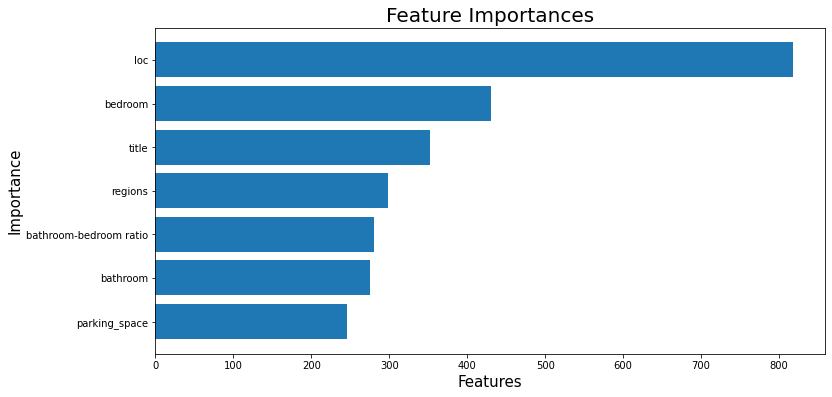

In [13]:
# Get the best trained model from GridSearchCV
best_model = grid_search.best_estimator_
# Get feature importances from the best trained model
feature_importances = best_model.feature_importances_
# Create a pandas DataFrame to store the feature importances along with the feature names
importance_df = pd.DataFrame({'Feature': feature.columns, 'Importance': feature_importances})
# Sort the DataFrame in descending order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
#plt.xticks(rotation=15)
plt.xlabel('Features',fontsize=15,)
plt.ylabel('Importance',fontsize=15,)
plt.title('Feature Importances', fontsize=20, )
plt.show()

## Final Predictions

In [14]:
# Predictions
predict = grid_search.predict(ft_test)
predict.shape[0],x_test.shape[0], data_test.ID.shape[0]


(6000, 2800, 6000)

In [15]:
container = {"ID": data_test.ID, "price": predict}
model_Predictions =  pd.DataFrame(container)
model_Predictions.ID = model_Predictions.ID.astype("category")

In [16]:
model_Predictions

,ID,price
0,845,2.369085e+06
1,1924,1.007242e+06
2,10718,1.286522e+06
3,12076,8.725004e+06
4,12254,1.865697e+06
...,...,...
5995,1594,1.706511e+06
5996,2416,1.926891e+06
5997,10195,1.968281e+06
5998,9455,1.351411e+06


## Exporting Predictions

In [58]:
model_Predictions.to_csv("My_Submission.csv", index=False)